# Deep Learning mushukni aniqlovchi model

In [3]:
from fastai.vision.all import *
from ipywidgets import widgets

#data
path =untar_data(URLs.PETS)/'images'

#labellovchi funksiya
def is_cat(x): return x[0].isupper()

#datalarni yuklovchi (dataloaders)
dls = ImageDataLoaders.from_name_func(
      path, get_image_files(path),valid = 0.2,seed=42,
      label_func =is_cat, item_tfms=Resize(224)
)

#o'qitish (train)
learn =cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 140MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.159652,0.025000,0.990528,00:57


epoch,train_loss,valid_loss,accuracy,time
0,0.078988,0.037389,0.989175,00:59
1,0.034466,0.007793,0.997294,00:56


# Modelni tekshirish

In [4]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi: True
Aniqligi ehtimoligi: 1.000000


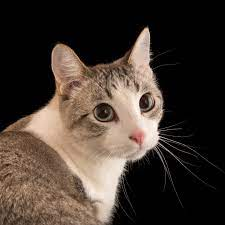

In [5]:
img = PILImage.create(upload.data[-1])
pred, _,prob=learn.predict(img)
print(f"Mushukmi: {pred}")
print(f"Aniqligi ehtimoligi: {prob[1].item():3f}")
img